# pbskids
In this dataset, you are provided with game analytics for the PBS KIDS Measure Up! app. 

Each assessment is designed to test a child's comprehension of a certain set of measurement-related skills.
### *There are five assessments*
- Bird Measurer
- Cart Balancer
- Cauldron Filler
- Chest Sorter
- Mushroom Sorter.

## Goal

***Forecast how many attempts a child will take to pass a given assessment(an incorrect answer is counted as an attempt).***

Each set:
- Training set
    - you are provided the full history of gameplay data. 
- Test set
    - we have truncated the history after the start event of a single assessment, chosen randomly, **for which you must predict the number of attempts.**

## train.csv & test.csv
These are the main data files which contain the gameplay events.

### event_id 
- Randomly generated unique identifier for the event type. Maps to event_id column in specs table.
- **specific to the title or game**.
    - For example, 
    - **the eventids 6043a2b4 (All star sorting) and d3640339 (Dino dive) represent the same eventcode 4090(player clicks help button) but belong to different games thus have different event_id**
    
### event_count
- **Incremental counter** of events within a game session (offset at 1). Extracted from event_data.
    - There are some rows which have same set of **evenid** and **installid**,
        - The *timestamp* is later , The more *event_count*
        

### event_code
- Identifier of the event 'class'. Unique per game, but may be duplicated across games. E.g...
    - Start of the title(game/activity/clip/assessment) is always recorded with event_code 2000.
- **An event_code can be thought of as a category, **
- Assessment attempts(with their outcome - correct or incorrect) are captured in eventcode 4100 for all assessments except for Bird measurer which has the event_code 4110. 



### game_session
- Randomly generated unique identifier grouping events within a single game or video play session.

### timestamp
- Client-generated datetime
- Event occured.
    - Maybe, timestamp col contains some timezone.
        - because, It doesn't sound realistic that kids play game in midneight(AM2~)
        
    
### event_data
- Semi-structured JSON formatted string containing the events parameters. Default fields are: 
    - event_count
    - event_code
    - game_time
    - otherwise fields are determined by the event type.
 
- The system records **all the actions (both Janet's as well as the system response) as events**.
    - For example, the events could be the following: she ...   
        - presses the play button
            - Ex. the x,y co-ordinates of the click is also noted. 
        - drags the dinosaurs, 
        - places the dinosaurs in the right home, 
- the system gives instructions, feedback if her **action** is correct or not.
- event_data captures detailed information based on the event. 
    - Each of these **events** have a corresponding **event_id** and **event_code**.

### installation_id
- Randomly generated unique identifier grouping game sessions within a single installed application instance.
- Each application install is represented by an installation_id. **This will typically correspond to one child, **
    - but you should expect noise from issues such as shared devices. 
    - **Joe (Janet's little brother) also shares the same Ipad, and often plays the game.**
- train: contains many installation_ids which never took assessments, 
- test : every installation_id made an attempt on at least **one assessment.**

### game_time
- Time in milliseconds since the start of the game session. Extracted from event_data.

### title
- Title of the game or video.
- There are multiple media **title** belonging to the different types. 

### type
- Media type of the game or video. Possible values are:
    - Exposure(video clip)   
        - Videos are intended to expose the kid to a topic or a problem solving approach. 
            - Videos typically model or explain things. 
            - There is no interactive component to videos. 
        - Clips can further be classified into:
            - Interstitials: 
                - short transitional videos between worlds or sections of the world
                    e.g. 'Crystal Caves - Level 1'). These videos merely hint to the subject matter.
            - Longer clips (2-3 minutes in length):
                - these videos explain an important subject or approach with the help of familiar characters from the PBS KIDS world. 
                - Typically these videos have been excerpted from longer television episodes.
        - Keep in mind in the dataset only the start of the video playback is captured. 
            - Therefore there are far fewer events corresponding to clips than there are to games or assessments. 
            - That does not mean clips are 
                - less popular
                - lack of interactivity not withstanding, 
            - there is good evidence that video contributes significantly to learning outcomes:D
    - Exploration(activity)
        - open-ended mini-games that allow kids to practice their skills in an environment that mimics real life play patterns to support “messing about”. 
        - Activities do not have a defined goal, but they do typically model cause and effect. 
        - We sometimes refer to Activities as 'sandboxes' or 'toys'.
    - Practice(game)
        - goal : solving a specific problem. 
        - Each challenge may belong to a progressively more challenging round (marked in the data), and multiple rounds may be grouped into levels. 
        - Games do not end until the player finishes the game or decides to exit the play session.
        - If a final goal is achieved, there is usually an option to replay the entire game from the start.

    - Demonstration(assessment).
        - Assessments are interactives that are designed specifically with the goal of measuring a player’s knowledge of the subject matter. 
        - Metrics : the number of incorrect answers leading to the assessment solution

- Each of the worlds in the app may have one or more such sequences of media objects, 
    - In normal, user should follow above order
        - However, kids are not required to follow the path that is laid out for them, 
    - sometimes the app does not follow this exact formula. 

- There are multiple media **title** belonging to the different types. 
    - For example, within the 'Treetop city' there are 
        - All star sorting(Game) 
        - Treasure map(Clip)
        - Fireworks(Activity) 
        - amongst others.
- games/assessments might have multiple rounds/levels.
    - **The level of difficulty is the same for everyone, 

### world
- The section of the application the game or video belongs to. 
- Helpful to identify the educational curriculum goals of the media. Possible values are:
    - NONE (at the app's start screen)
    - TREETOPCITY (Length/Height)
    - MAGMAPEAK (Capacity/Displacement)
    - CRYSTALCAVES (Weight)

## specs.csv
This file gives the specification of the various event types.

### event_id
- Global unique identifier for the event type. Joins to event_id column in events table.
### info
- Description of the event.

### args
- JSON formatted string of event arguments. Each argument contains:

### name
- Argument name.

### type
- Type of the argument (string, int, number, object, array).

### info
- Description of the argument.

## df_train_labels

show how these groups would be computed on the assessments in the training set. 
### (dependency) 
- num_correct/(num_correct + num_incorrect) = accuracy
### accuracy_group(Goal)
- 3: the assessment was solved on the first attempt
- 2: the assessment was solved on the second attempt
- 1: the assessment was solved after 3 or more attempts
- 0: the assessment was never solved
#### Especially refer to:
    - https://www.kaggle.com/c/data-science-bowl-2019/discussion/114198#latest-676720


# Refer to
- *https://www.kaggle.com/c/data-science-bowl-2019/discussion/117019#latest-671781*
- *https://www.kaggle.com/c/data-science-bowl-2019/discussion/115034#latest-675608*
- *https://www.kaggle.com/c/data-science-bowl-2019/discussion/115585#latest-679819*
- *https://www.kaggle.com/shahules/xgboost-feature-selection-dsbowl*

In [91]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display,HTML,Image, display_png
import pickle
import re
from itertools import zip_longest
from collections import Counter
import datetime
from datetime import datetime as dt
import copy
from functools import reduce
from tqdm import tqdm_notebook as tqdm
import os
import multiprocessing
import json
import time
from tqdm import tqdm
from pandas import Panel

/Users/macico/Dropbox/tanico_rikudo/deep/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version


## Set up 
- ENV
- collaborate with : tqdm 

In [93]:
N_CORE = multiprocessing.cpu_count()
tqdm.pandas()

In [3]:
df_train = pd.read_csv('../source/train.csv.zip')
df_train_labels = pd.read_csv('../source/train_labels.csv.zip')
df_specs = pd.read_csv('../source/specs.csv')

In [4]:
df_test = pd.read_csv('../source/test.csv.zip')

In [5]:
df_train.head(3)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [6]:
df_train_labels.head(3)

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3


In [7]:
df_specs.head(3)

,event_id,info,args
0,2b9272f4,The end of system-initiated feedback (Correct)...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
1,df4fe8b6,The end of system-initiated feedback (Incorrec...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
2,3babcb9b,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."


In [8]:
df_test.head(3)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,c1ea43d8b8261d27,2019-09-10T16:50:55.503Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,27253bdc,7ed86c6b72e725e2,2019-09-10T16:51:51.805Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK


# Clean data
## df_train_labels

In [9]:
#almost same 
df_train_labels.loc[df_train_labels.accuracy != (df_train_labels.num_correct.astype(float) / (df_train_labels.num_correct + df_train_labels.num_incorrect) )].head(10)


,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
23,cace4c493ac347e3,002db7e3,Bird Measurer (Assessment),1,10,0.090909,1
82,7e02851957b1e0df,00fc65b6,Chest Sorter (Assessment),1,10,0.090909,1
681,2170a71b0a17a8b1,08987c08,Cauldron Filler (Assessment),1,14,0.066667,1
701,4b56d80d68ebf4f6,08987c08,Cauldron Filler (Assessment),1,14,0.066667,1
743,8c8d5067b69f86c8,08987c08,Mushroom Sorter (Assessment),1,10,0.090909,1
813,fd27f7c1de0a63a8,08987c08,Cauldron Filler (Assessment),1,23,0.041667,1
1270,de0d1bd6d696eeb8,1091d87b,Bird Measurer (Assessment),1,10,0.090909,1
2071,9ec1bcd36a0a00fe,1b142503,Chest Sorter (Assessment),1,10,0.090909,1
2522,472ed774445f5492,1f71eb61,Mushroom Sorter (Assessment),1,10,0.090909,1
3177,3016d752926830b4,2ac9d9d3,Chest Sorter (Assessment),1,10,0.090909,1



### There are idx which does not contain in list of train_label 
-  There are NO correct and incorrect info in game session No. : 00cdd9bd1e26e726 　

In [10]:

set_session_instid_train = set(df_train[df_train.type == 'Assessment'].game_session + df_train[df_train.type == 'Assessment'].installation_id) 
# set_session_instid_train_valid = set(df_train_not_start[df_train_not_start.type == 'Assessment'].game_session + df_train_not_start[df_train_not_start.type == 'Assessment'].installation_id) 
set_session_instid_label = set(df_train_labels.game_session+df_train_labels.installation_id)
print(len(set_session_instid_train))
# print(len(set_session_instid_train_valid))
print(len(set_session_instid_label) )

21239
17690


In [11]:

ls_game_session_non_taget = list(set(df_train.game_session)-set(df_train_labels.game_session))

## df_train

In [12]:
# Check type
df_train.dtypes

event_id           object
game_session       object
timestamp          object
event_data         object
installation_id    object
event_count         int64
event_code          int64
game_time           int64
title              object
type               object
world              object
dtype: object

In [13]:
# Check type
df_train.isnull().sum()

event_id           0
game_session       0
timestamp          0
event_data         0
installation_id    0
event_count        0
event_code         0
game_time          0
title              0
type               0
world              0
dtype: int64

In [14]:
for _col in df_train.columns:
    
    print(_col+' ',end="")
    if df_train[_col].dtype=='object' :
        print(df_train[_col].value_counts())
    print(" ")

event_id 1325467d    274673
bb3e370b    256179
cf82af56    224694
5e812b27    206129
cfbd47c8    199734
             ...  
1b54d27f         1
4074bac2         1
17ca3959         1
003cd2ee         1
5dc079d8         1
Name: event_id, Length: 384, dtype: int64
 
game_session 6e6e697f2e593de1    3368
bb1f09ec062b6660    3182
33495c8f126e2ef9    2505
34c82b23355e378c    2456
8fe0ab3c3e448a04    2398
                    ... 
677c771f8f87922d       1
64ccfa8855701090       1
b512a81b80a57d61       1
696708bffec2c130       1
d292b97c4584885e       1
Name: game_session, Length: 303319, dtype: int64
 
timestamp 2019-08-01T20:08:13.052Z    11
2019-08-27T23:32:20.845Z    10
2019-09-03T17:03:39.700Z    10
2019-08-27T23:32:20.834Z    10
2019-09-03T17:03:39.779Z    10
                            ..
2019-09-27T18:49:44.160Z     1
2019-08-27T01:43:54.323Z     1
2019-08-25T21:14:28.318Z     1
2019-10-11T20:51:22.753Z     1
2019-09-02T21:48:12.671Z     1
Name: timestamp, Length: 10777308, dtype: int64


##  Concat train + train_label

In [15]:
df_train

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK
...,...,...,...,...,...,...,...,...,...,...,...
11341037,ab3136ba,c09b94eebfdf50a6,2019-10-10T15:11:15.584Z,"{""description"":""Tap another dinosaur."",""identi...",fffc0583,66,3110,118615,Dino Dive,Game,MAGMAPEAK
11341038,27253bdc,6ad8ab25003ef1b0,2019-10-10T15:12:17.364Z,"{""event_code"": 2000, ""event_count"": 1}",fffc0583,1,2000,0,Crystal Caves - Level 2,Clip,CRYSTALCAVES
11341039,27253bdc,71904dca23b982c6,2019-10-10T15:13:04.713Z,"{""event_code"": 2000, ""event_count"": 1}",fffc0583,1,2000,0,Crystal Caves - Level 3,Clip,CRYSTALCAVES
11341040,27253bdc,2267b18f069e875a,2019-10-10T15:13:54.545Z,"{""event_code"": 2000, ""event_count"": 1}",fffc0583,1,2000,0,Crystal Caves - Level 3,Clip,CRYSTALCAVES


### Convert Columns
#### *timestamp*
- Convert dtype to use easily

In [16]:
df_train.timestamp = pd.to_datetime(df_train.timestamp,format='%Y-%m-%dT%H:%M:%S.%f')

In [17]:
df_train['month']      = df_train.timestamp.dt.month
df_train['hour']       = df_train.timestamp.dt.hour
df_train['year']       = df_train.timestamp.dt.year
df_train['dayofweek']  = df_train.timestamp.dt.dayofweek
df_train['weekofyear'] = df_train.timestamp.dt.weekofyear

In [18]:
ls_col_time = ['timestamp','month','hour','year','dayofweek','weekofyear']

### Add and Convert Columns
#### *Assessment attempts* & *IsAssessmentCorrect*

Admin says..
- The file train_labels.csv has been provided to show how these groups would be computed on the assessments in the training set. 
- Assessment attempts are captured in event_code 4100 for all assessments except for Bird Measurer, which uses event_code 4110. 
- If the attempt was correct, it contains "correct":true.

*https://www.kaggle.com/artgor/oop-approach-to-fe-and-models*

In [19]:

df_train['AssessmentAttempt'] = 0
df_train.loc[(df_train.title =='Bird Measurer (Assessment)')&(df_train.event_code==4110),'AssessmentAttempt'] = 1
df_train.loc[(df_train.type  =='Assessment') & (df_train.title != 'Bird Measurer (Assessment)') & (df_train.event_code == 4100), 'AssessmentAttempt'] = 1

In [20]:

df_train['IsAssessmentCorrect'] = None
df_train.loc[(df_train.event_data.str.contains( '"correct":true'))&(df_train.AssessmentAttempt==1),'IsAssessmentCorrect'] = True
df_train.loc[(df_train.event_data.str.contains('"correct":false'))&(df_train.AssessmentAttempt==1),'IsAssessmentCorrect'] = False

In [21]:
df_train['IsAssessmentCorrect'].value_counts(dropna=False)

NaN      11299493
False       28088
True        13461
Name: IsAssessmentCorrect, dtype: int64

## Drill *Event data*

In [22]:
def decode_json(ls_idx_df_train):
    df_event_json = pd.io.json.json_normalize(df_train.loc[ls_idx_df_train].event_data.progress_apply(json.loads))

In [23]:
### TOOOOOOO heavy
### Cannot execute my laptop ><

# n_use_core = N_CORE-1
# p = multiprocessing.Pool(n_use_core)
# ls_ls_idx_df_train = [  df_train.index[i::(n_use_core*2)] for i in range(n_use_core*2)]
# try:
#     ls_df_train = p.map(decode_json,ls_ls_idx_df_train)
# except:
#     pass
# finally:
#     p.close()


In [24]:
# df_train = pd.concat(ls_df_train,axis=0)

# User features

## *Game session*

In [25]:
def lenset(_set):
    return  len(list(set(_set)))
def floatlen(_set):
    return  float(len(_set))
def max_d_len(_set):
    return  max(_set)/float(len(_set))

In [26]:
agg_func_game_session_validation={
    'event_count':['max',max_d_len],#max_d_len,
    'game_time':max_d_len,
    'event_id':'count'
}

agg_func_game_session={
    'game_time':max_d_len,
    'event_id':'count'
}
agg_func_game_settting_validation={
    'title':lenset,
    'world':lenset,
    'type':lenset
}

In [27]:
def make_df_group(df_tmp,ls_col_group,agg_func):
    df_game_session_validation= \
        df_tmp.drop(ls_col_time,axis=1).groupby(
            ls_col_group,
            as_index=False,
            sort=False
        ).agg(agg_func)
    return df_game_session_validation
    
def clean_start_event(df_tmp):
    return df_tmp.loc[df_tmp.event_code != 2000]

def clean_target_idx(df_tmp,ls_game_session_non_taget):
    return df_tmp.drop(index=ls_game_session_non_taget)

In [28]:
print('start screen event: ',df_train.loc[df_train.event_code == 2000].shape[0]/float(df_train.shape[0]))
df_train_not_start = clean_start_event(df_train)
print('Not start screen event: ',df_train_not_start.shape[0]/float(df_train.shape[0]))

start screen event:  0.02674524968693353
Not start screen event:  0.9732547503130665


In [29]:
#Event code :2000 is START screen 
df_train[df_train.game_session=='45bb1e1b6b50c07b']

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,month,hour,year,dayofweek,weekofyear,AssessmentAttempt,IsAssessmentCorrect
0,27253bdc,45bb1e1b6b50c07b,2019-09-06 17:53:46.937000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,9,17,2019,4,36,0,None


### Pick up *game_time* 

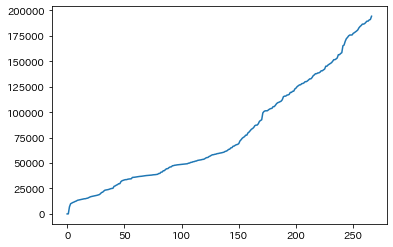

In [30]:
y = (df_train[df_train.game_session=='0848ef14a8dc6892'].game_time)
x = range(len(y))
plt.plot(x,y)

## Check set of *Title, world and type* is unique to set of *install_id and session*

In [31]:

df_user_game_settting_validation = df_train.drop(ls_col_time,axis=1)[['installation_id','game_session','title','world','type']].groupby(['installation_id','game_session'],as_index=True,sort=False).agg(agg_func_game_settting_validation)
#All col is 1 . it means VALIDATED 
df_user_game_settting_validation.mean()

title    1.0
world    1.0
type     1.0
dtype: float64

## Check event_code

[Text(0, 0, '4070'),
 Text(0, 0, '4030'),
 Text(0, 0, '3010'),
 Text(0, 0, '3110'),
 Text(0, 0, '4020'),
 Text(0, 0, '2020'),
 Text(0, 0, '4035'),
 Text(0, 0, '2030'),
 Text(0, 0, '2000'),
 Text(0, 0, '3020'),
 Text(0, 0, '3120'),
 Text(0, 0, '3021'),
 Text(0, 0, '3121'),
 Text(0, 0, '4025'),
 Text(0, 0, '4021'),
 Text(0, 0, '4040'),
 Text(0, 0, '4100'),
 Text(0, 0, '4022'),
 Text(0, 0, '4010'),
 Text(0, 0, '4031'),
 Text(0, 0, '2040'),
 Text(0, 0, '2080'),
 Text(0, 0, '4230'),
 Text(0, 0, '4235'),
 Text(0, 0, '2050'),
 Text(0, 0, '2083'),
 Text(0, 0, '5000'),
 Text(0, 0, '5010'),
 Text(0, 0, '4045'),
 Text(0, 0, '2025'),
 Text(0, 0, '4220'),
 Text(0, 0, '2060'),
 Text(0, 0, '4095'),
 Text(0, 0, '4090'),
 Text(0, 0, '4110'),
 Text(0, 0, '2010'),
 Text(0, 0, '2035'),
 Text(0, 0, '2081'),
 Text(0, 0, '2070'),
 Text(0, 0, '2075'),
 Text(0, 0, '4050'),
 Text(0, 0, '4080')]

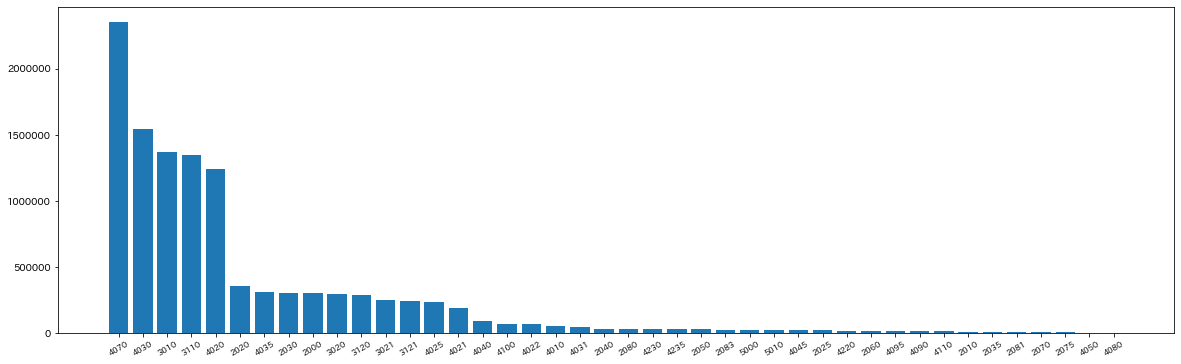

In [32]:
y=df_train.event_code.value_counts()
fig, ax = plt.subplots(figsize=(20, 6))
plt.bar(range(len(y)),y.values)
ax.set_xticks(range(len(y.index)))
ax.set_xticklabels(list(y.index), rotation=30, fontsize='small')

In [33]:
y.values

array([2349642, 1544814, 1368695, 1345452, 1237789,  353006,  310875,
        306032,  303319,  292655,  289230,  248370,  243732,  233083,
        190783,   91879,   69640,   67102,   54698,   47176,   33743,
         33497,   31535,   31526,   29691,   23091,   21998,   21541,
         20166,   19987,   18777,   15770,   15587,   13724,   13608,
         11696,   11196,    8403,    7654,    6925,    1989,     966])

## Check *session and type, world*

In [34]:
# use df_train_not_start
# df_game_session_type  = make_df_group(df_train_not_start,['installation_id','game_session','type' ],agg_func_game_session_validation)
# df_game_session_world = make_df_group(df_train_not_start,['installation_id','game_session','world'],agg_func_game_session_validation)

df_game_session_world_type = make_df_group(df_train_not_start,['installation_id','game_session','world','type'],agg_func_game_session_validation)

/Users/macico/Dropbox/tanico_rikudo/deep/python3.7/lib/python3.7/site-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


(0, 3)

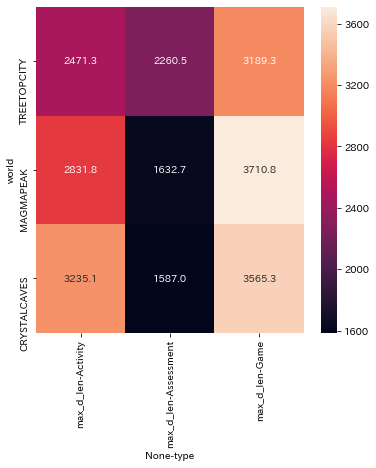

In [35]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(df_game_session_world_type.pivot_table(index='world',columns=['type'],values='game_time',aggfunc='mean'),annot=True,fmt="1.1f",ax=ax)
ax.set_ylim(0,3)

In [36]:
df_train_labels

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.000000,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.000000,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.000000,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.500000,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.000000,3
...,...,...,...,...,...,...,...
17685,c996482b11d149dd,ffc90c32,Bird Measurer (Assessment),1,0,1.000000,3
17686,b05a02b52d5c1f4c,ffd2871d,Cauldron Filler (Assessment),1,0,1.000000,3
17687,5448d652309a6324,ffeb0b1b,Cauldron Filler (Assessment),1,2,0.333333,1
17688,a6885ab824fbc32c,ffeb0b1b,Mushroom Sorter (Assessment),0,1,0.000000,0


### Check sequence to Asseement

In [37]:

df_train_install_num = (df_train_not_start.pivot_table(index='installation_id',values='game_session',aggfunc=len)).sort_values(by='game_session',ascending=False)

つぎは各install idにおける受講したもののの流れを見る。
level を見てもいいかもね


       game_session
count  12128.000000
mean     910.102490
std     1862.643739
min        1.000000
25%      119.000000
50%      337.000000
75%      913.000000
max    57728.000000


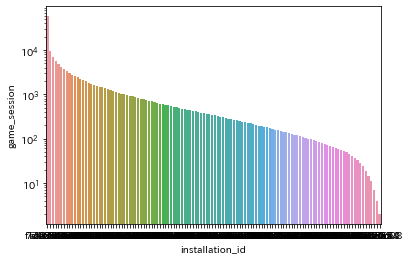

In [38]:
df_tmp = df_train_install_num.reset_index()
print(df_tmp.describe())
df_tmp = df_tmp[::100]
sns.barplot(data=df_tmp,x='installation_id',y='game_session')
plt.yscale('log')


- 1.each install id について、game_sesisn

In [96]:
pwd

'/Users/macico/Dropbox/tanico_rikudo/deep/python3.7/Tackle-kaggle/PbsKids/analysis'

In [99]:
with open('../pickle/dct_assessment_instid.pickles','wb') as f:
    pickle.dump(dct_assessment_instid,f)

In [100]:
with open('../pickle/df_train.pickles','wb') as f:
    pickle.dump(df_train,f)

OSError: [Errno 22] Invalid argument

## Making feature for ML
- the goal of this comp is predicting ACCURACY in LAST assessment

In [128]:
obj_uid = df_train.groupby('installation_id')

# Check each obj
# for uid, obj in tqdm(obj_uid):
#     ls_assessment_instid.apppend(make_instid_feature(obj))

dct_assessment_instid = {}
for i,(uid, obj) in tqdm(enumerate(obj_uid)) :
    dct_assessment_instid[uid] = make_instid_feature(obj) 









0it [00:00, ?it/s]






1it [00:02,  2.82s/it]






3it [00:02,  1.99s/it]






7it [00:03,  1.40s/it]






11it [00:03,  1.01it/s]






14it [00:03,  1.42it/s]






17it [00:03,  1.97it/s]






23it [00:03,  2.77it/s]






31it [00:03,  3.89it/s]






36it [00:03,  5.35it/s]






46it [00:03,  7.42it/s]






55it [00:04, 10.08it/s]






61it [00:04, 13.37it/s]






67it [00:04, 17.43it/s]






73it [00:04, 21.30it/s]






79it [00:04, 24.77it/s]






84it [00:04, 22.77it/s]






95it [00:04, 29.55it/s]






104it [00:05, 35.77it/s]






111it [00:05, 32.65it/s]






121it [00:05, 33.79it/s]






128it [00:05, 38.00it/s]






137it [00:05, 44.62it/s]






143it [00:05, 41.06it/s]






149it [00:06, 44.74it/s]






155it [00:06, 45.29it/s]






161it [00:06, 43.33it/s]






171it [00:06, 50.74it/s]






178it [00:06, 53.84it/s]






184it [00:06, 47.80it/s]






190it [00:06, 42.64it/s]






195it [00:07, 27.42it/s]






202it [00:07, 33.23it/s]




KeyboardInterrupt: 

In [118]:
dct_world = {_order : str_world  for _order,str_world in  enumerate(list(set(df_train.world)))}
dct_type = {_order : str_type for _order,str_type in   enumerate(list(set(df_train.type)))}
dct_assessment ={ _order : str_title for _order,str_title in  enumerate(list(set(df_train[df_train.type=='Assessment'].title)))}

In [110]:
def set_dct_assessment():
    # set history
    dct_n_accumrate_took_world = {'n_accumrate_took_world_'+str_world : 0 for str_world in dct_world.values()} 
    dct_n_accumrate_took_type  = {'n_accumrate_took_type_'+str_type : 0 for str_type in dct_type.values()} 
    dct_time_accumrate_took_world = {'time_accumrate_took_world_'+str_world : 0 for str_world in dct_world.values()} 
    dct_time_accumrate_took_type  = {'time_accumrate_took_type_'+str_type : 0 for str_type in dct_type.values()} 
    
    dct_acc_assessment = {}
    dct_acc_assessment.update(**dct_n_accumrate_took_world, **dct_n_accumrate_took_type, **dct_time_accumrate_took_world, **dct_time_accumrate_took_type)
    dct_acc_assessment['ave_accuracy_group'] = 0
#     print(dct_acc_assessment) 
    return dct_acc_assessment

In [124]:
def make_instid_feature(obj_instid):
    
    #dct : from past session to next session
    dct_acc_assessment = set_dct_assessment()
    
    dct_assessment_instid = {}
    
    dct_sum_acc_group  = {'sum_acc_group_'+str_assessment : 0 for str_assessment in dct_assessment.values()} 
    dct_n_assessment  =  {str_assessment : 0 for str_assessment in dct_assessment.values()} 
    
    # each session in instid
    # one session has some records
    for _game_session ,session in obj_instid.groupby('game_session'):
        #sort
        session = session.sort_index()
        
        #set meta info
        # regardless of Assessment
        _type = session.type.iloc[0]
        _world = session.world.iloc[0]
        _title = session.title.iloc[0]
        
        dct_acc_assessment['n_accumrate_took_world_'+_world]+=1
        dct_acc_assessment['n_accumrate_took_type_'+_type]+=1
        dct_acc_assessment['time_accumrate_took_world_'+_world]+=session.game_time.sum()
        dct_acc_assessment['time_accumrate_took_type_'+_type]+=session.game_time.sum()
        
        #Assessment  
        if _type=='Assessment':
            dct_acc_assessment['n_correct']= len(session[session.IsAssessmentCorrect==True])
            dct_acc_assessment['n_incorrect']= len(session[session.IsAssessmentCorrect==False])
            dct_acc_assessment['accuracy']=0.0
#             print(dct_acc_assessment['n_correct'])
            if (dct_acc_assessment['n_correct']!=0)&(dct_acc_assessment['n_incorrect']!=0):
                dct_acc_assessment['accuracy']=dct_acc_assessment['n_correct']/float(dct_acc_assessment['n_incorrect'])

            #集計
            dct_sum_acc_group['sum_acc_group_'+_title] +=dct_acc_assessment['accuracy']
            dct_n_assessment[_title]   +=1
            
            dct_acc_assessment['ave_accuracy_group'] = sum(dct_sum_acc_group.values())/float(sum(dct_n_assessment.values()))
            
            # Add user features and reset
            dct_assessment_instid[_game_session] = dct_acc_assessment
            dct_acc_assessment = set_dct_assessment()
        
        # if the last record of user is not 'Assessment',this procedure discard record which is after last assessment.
            
    return dct_assessment_instid
            
    

In [126]:
dct_assessment_instid

{'0001e90f': {}}

In [116]:
for _inst_id,dct_assessment in dct_assessment_instid.items():
    if dct_assessment != {}:
        print(pd.DataFrame(dct_assessment))
        break

Empty DataFrame
Columns: []
Index: []


In [129]:
df_train_features = pd.concat([pd.DataFrame(dct_assessment) for _inst_id,dct_assessment in dct_assessment_instid.items()],axis=0)


In [ ]:
df_train_features_Y = pd.merge(df_train_feature ,df_train_labels[['game_session','installation_id']],on=['game_session','installation_id',how='outer')

In [67]:
ls_assessment_instid

[]

In [54]:
for i,obj_instid in df_train.groupby('installation_id'):
     make_instid_feature(obj_instid)

      event_id      game_session                        timestamp  \
0     27253bdc  45bb1e1b6b50c07b 2019-09-06 17:53:46.937000+00:00   
1     27253bdc  17eeb7f223665f53 2019-09-06 17:54:17.519000+00:00   
2     77261ab5  0848ef14a8dc6892 2019-09-06 17:54:56.302000+00:00   
3     b2dba42b  0848ef14a8dc6892 2019-09-06 17:54:56.387000+00:00   
4     1bb5fbdb  0848ef14a8dc6892 2019-09-06 17:55:03.253000+00:00   
...        ...               ...                              ...   
1352  84538528  ca8b415f34d12873 2019-09-06 18:17:50.487000+00:00   
1353  b2dba42b  ca8b415f34d12873 2019-09-06 18:17:50.489000+00:00   
1354  1bb5fbdb  ca8b415f34d12873 2019-09-06 18:17:51.703000+00:00   
1355  27253bdc  3fce4f09769ff0b7 2019-09-06 18:18:11.250000+00:00   
1356  27253bdc  04168b61c0650977 2019-09-06 18:18:42.392000+00:00   

                                             event_data installation_id  \
0                {"event_code": 2000, "event_count": 1}        0001e90f   
1                {"ev

KeyboardInterrupt: 

In [46]:
## each install is = User
dct_inst_id = {}
dct_inst_id['world'] = 

def 


        event_id      game_session                        timestamp  \
420196  5b49460a  00cdd9bd1e26e726 2019-09-29 02:33:16.767000+00:00   
420197  155f62a4  00cdd9bd1e26e726 2019-09-29 02:33:17.130000+00:00   
420198  3dcdda7f  00cdd9bd1e26e726 2019-09-29 02:33:17.132000+00:00   
420199  3ccd3f02  00cdd9bd1e26e726 2019-09-29 02:33:19.690000+00:00   
420200  3dcdda7f  00cdd9bd1e26e726 2019-09-29 02:33:19.694000+00:00   
420201  3ccd3f02  00cdd9bd1e26e726 2019-09-29 02:33:22.088000+00:00   
420202  3dcdda7f  00cdd9bd1e26e726 2019-09-29 02:33:22.089000+00:00   
420203  3ccd3f02  00cdd9bd1e26e726 2019-09-29 02:33:24.723000+00:00   

                                               event_data installation_id  \
420196  {"version":"1.0","event_count":1,"game_time":0...        08987c08   
420197  {"event_count":2,"game_time":385,"event_code":...        08987c08   
420198  {"description":"Order the treasure chests from...        08987c08   
420199  {"description":"Order the treasure chests fr

In [47]:
df_train_labels[df_train_labels.game_session=='00cdd9bd1e26e726']

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group


In [145]:
(df_train_labels.title + df_train_labels.installation_id).value_counts()

Mushroom Sorter (Assessment)08987c08    46
Mushroom Sorter (Assessment)f1c21eda    39
Cauldron Filler (Assessment)08987c08    34
Cauldron Filler (Assessment)96979008    29
Bird Measurer (Assessment)f1c21eda      29
                                        ..
Mushroom Sorter (Assessment)4696a3f5     1
Chest Sorter (Assessment)dfca2f03        1
Cart Balancer (Assessment)8c769312       1
Cauldron Filler (Assessment)e2d7188c     1
Cart Balancer (Assessment)129ae199       1
Length: 9386, dtype: int64

In [148]:
df_train[(df_train.title=='Mushroom Sorter (Assessment)')&(df_train.installation_id=='08987c08')&(df_train.IsAssessmentCorrect==True)]

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,month,hour,year,dayofweek,weekofyear,AssessmentAttempt,IsAssessmentCorrect
411052,25fa8af4,8c8d5067b69f86c8,2019-08-05 23:30:09.973000+00:00,"{""correct"":true,""stumps"":[1,2,4],""event_count""...",08987c08,95,4100,203524,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,8,23,2019,0,32,1,True
411092,25fa8af4,f6e815cf74f874c7,2019-08-05 23:31:15.180000+00:00,"{""correct"":true,""stumps"":[1,2,4],""event_count""...",08987c08,36,4100,50639,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,8,23,2019,0,32,1,True
411194,25fa8af4,64feae3c69e17073,2019-08-05 23:33:28.816000+00:00,"{""correct"":true,""stumps"":[1,2,4],""event_count""...",08987c08,98,4100,119089,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,8,23,2019,0,32,1,True
411251,25fa8af4,eca7a8f3faecb57d,2019-08-05 23:35:07.122000+00:00,"{""correct"":true,""stumps"":[1,2,4],""event_count""...",08987c08,53,4100,84083,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,8,23,2019,0,32,1,True
411296,25fa8af4,18eecca053b49f6c,2019-08-05 23:36:49.438000+00:00,"{""correct"":true,""stumps"":[1,2,4],""event_count""...",08987c08,41,4100,87791,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,8,23,2019,0,32,1,True
411338,25fa8af4,41021304981442f8,2019-08-05 23:37:29.426000+00:00,"{""correct"":true,""stumps"":[1,2,4],""event_count""...",08987c08,37,4100,23400,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,8,23,2019,0,32,1,True
411373,25fa8af4,0600500689b7f3c0,2019-08-05 23:38:07.002000+00:00,"{""correct"":true,""stumps"":[1,2,4],""event_count""...",08987c08,29,4100,22887,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,8,23,2019,0,32,1,True
411415,25fa8af4,59e1383bba74d5df,2019-08-05 23:39:06.848000+00:00,"{""correct"":true,""stumps"":[1,2,4],""event_count""...",08987c08,37,4100,44621,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,8,23,2019,0,32,1,True
411462,25fa8af4,c1001c415ca4dfbc,2019-08-05 23:40:36.880000+00:00,"{""correct"":true,""stumps"":[1,2,4],""event_count""...",08987c08,42,4100,73696,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,8,23,2019,0,32,1,True
413619,25fa8af4,9fa0c7706b16195b,2019-08-07 14:45:48.395000+00:00,"{""correct"":true,""stumps"":[1,2,4],""event_count""...",08987c08,34,4100,45270,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,8,14,2019,2,32,1,True


In [179]:
##　Same install id and same title assessment... 
## in this situation, Which accuracy group is precisely???
##  

df_tmp = df_train_labels[(df_train_labels.title=='Mushroom Sorter (Assessment)')&(df_train_labels.installation_id=='08987c08')]
df_tmp.game_session.value_counts()

fa5e87beab95f326    1
59e1383bba74d5df    1
e44b7df81985837a    1
e160d226b2396022    1
1670a270f4c6ce30    1
6c04779f10a543a6    1
4a788a81129f73c1    1
9152ee289217a6bd    1
eca7a8f3faecb57d    1
c7e05dab63f493ef    1
1aeabdc10e450e4e    1
b75adcc2b21b760c    1
7f3e197dd7fa6798    1
441470cfd69cfa95    1
97fdb49959206675    1
ee513e5ede6839f5    1
64feae3c69e17073    1
30cd8fd0496e221d    1
02a4526649adaf9c    1
1a98b9491eadb868    1
a34d85b815352748    1
8973262bcb6c8b48    1
c31848576df271a0    1
608137bbe500c90c    1
8c8d5067b69f86c8    1
7010038653b2f6e3    1
7c41c75cb2ba0d27    1
4e4c3e259f1a4f6b    1
18eecca053b49f6c    1
c49d86cdf8f314fc    1
61c2e3d5eb69258e    1
a96f346fd0b31836    1
5e6017de4ff65a70    1
8e33418b6268e2c8    1
b32cc2d6eaa740d7    1
41021304981442f8    1
c1001c415ca4dfbc    1
1823f4b47f38aaf0    1
b5aaa5d664aac2e5    1
9480013377b1d5d9    1
9018dc09bdc6ad8f    1
9fa0c7706b16195b    1
5723589c98865e5c    1
f6e815cf74f874c7    1
fa8dc10da551e098    1
0600500689

In [174]:
df_train[(df_train.game_session == '8c8d5067b69f86c8')&(df_train.type == 'Assessment')].IsAssessmentCorrect

410958    None
410959    None
410960    None
410961    None
410962    None
          ... 
411052    True
411053    None
411054    None
411055    None
411056    None
Name: IsAssessmentCorrect, Length: 99, dtype: object

        event_id      game_session                        timestamp  \
420196  5b49460a  00cdd9bd1e26e726 2019-09-29 02:33:16.767000+00:00   
420197  155f62a4  00cdd9bd1e26e726 2019-09-29 02:33:17.130000+00:00   
420198  3dcdda7f  00cdd9bd1e26e726 2019-09-29 02:33:17.132000+00:00   
420199  3ccd3f02  00cdd9bd1e26e726 2019-09-29 02:33:19.690000+00:00   
420200  3dcdda7f  00cdd9bd1e26e726 2019-09-29 02:33:19.694000+00:00   
420201  3ccd3f02  00cdd9bd1e26e726 2019-09-29 02:33:22.088000+00:00   
420202  3dcdda7f  00cdd9bd1e26e726 2019-09-29 02:33:22.089000+00:00   
420203  3ccd3f02  00cdd9bd1e26e726 2019-09-29 02:33:24.723000+00:00   

                                               event_data installation_id  \
420196  {"version":"1.0","event_count":1,"game_time":0...        08987c08   
420197  {"event_count":2,"game_time":385,"event_code":...        08987c08   
420198  {"description":"Order the treasure chests from...        08987c08   
420199  {"description":"Order the treasure chests fr

### *Convert Title* and 

Titile ans words have few kind of unique count.


*https://www.kaggle.com/artgor/oop-approach-to-fe-and-models*

In [183]:
df_test[df_test.type=='Assessment'].game_session.value_counts()

3002b35da98bf754    447
0db4f6f4be3730a2    440
99b2cc93ed91f997    384
e18ba7a4686ed585    342
6c27890e01a0af95    265
                   ... 
ec1d9bbf8782b9db      1
7132fffbdd33f5bb      1
c9bc4a0a886d82eb      1
40f8d70d6ded8d7c      1
9cc0156e8e26a54a      1
Name: game_session, Length: 3347, dtype: int64

In [180]:
df_test[df_test.game_session == 'b246933e8ac6a4aa']

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
1039233,77261ab5,b246933e8ac6a4aa,2019-09-13T00:10:33.535Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",e6862711,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
1039234,b2dba42b,b246933e8ac6a4aa,2019-09-13T00:10:33.667Z,"{""description"":""Let's build a sandcastle! Firs...",e6862711,2,3010,96,Sandcastle Builder (Activity),Activity,MAGMAPEAK
1039235,1325467d,b246933e8ac6a4aa,2019-09-13T00:10:33.743Z,"{""coordinates"":{""x"":800,""y"":257,""stage_width"":...",e6862711,3,4070,193,Sandcastle Builder (Activity),Activity,MAGMAPEAK
1039236,1325467d,b246933e8ac6a4aa,2019-09-13T00:10:34.839Z,"{""coordinates"":{""x"":710,""y"":257,""stage_width"":...",e6862711,4,4070,1252,Sandcastle Builder (Activity),Activity,MAGMAPEAK
1039237,1325467d,b246933e8ac6a4aa,2019-09-13T00:10:34.951Z,"{""coordinates"":{""x"":710,""y"":257,""stage_width"":...",e6862711,5,4070,1369,Sandcastle Builder (Activity),Activity,MAGMAPEAK
...,...,...,...,...,...,...,...,...,...,...,...
1043684,1325467d,b246933e8ac6a4aa,2019-09-13T00:12:53.056Z,"{""coordinates"":{""x"":885,""y"":202,""stage_width"":...",e6862711,4452,4070,139199,Sandcastle Builder (Activity),Activity,MAGMAPEAK
1043685,1325467d,b246933e8ac6a4aa,2019-09-13T00:12:53.075Z,"{""coordinates"":{""x"":327,""y"":257,""stage_width"":...",e6862711,4453,4070,139199,Sandcastle Builder (Activity),Activity,MAGMAPEAK
1043686,1325467d,b246933e8ac6a4aa,2019-09-13T00:12:53.089Z,"{""coordinates"":{""x"":883,""y"":202,""stage_width"":...",e6862711,4454,4070,139199,Sandcastle Builder (Activity),Activity,MAGMAPEAK
1043687,1325467d,b246933e8ac6a4aa,2019-09-13T00:12:53.111Z,"{""coordinates"":{""x"":880,""y"":201,""stage_width"":...",e6862711,4455,4070,139199,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [29]:
df_train.event_data

0                      {"event_code": 2000, "event_count": 1}
1                      {"event_code": 2000, "event_count": 1}
2           {"version":"1.0","event_count":1,"game_time":0...
3           {"description":"Let's build a sandcastle! Firs...
4           {"description":"Let's build a sandcastle! Firs...
                                  ...                        
11341037    {"description":"Tap another dinosaur.","identi...
11341038               {"event_code": 2000, "event_count": 1}
11341039               {"event_code": 2000, "event_count": 1}
11341040               {"event_code": 2000, "event_count": 1}
11341041               {"event_code": 2000, "event_count": 1}
Name: event_data, Length: 11341042, dtype: object

In [42]:
def save_pickle(filename,obj):
    path_folder = '../pickle/'
    with open(path_folder+filename+'.pickle','wb') as f:
        pickle.dump(obj,f)

In [43]:
save_pickle('df_train',df_train)
save_pickle('df_spec',df_spec)

OSError: [Errno 22] Invalid argument

In [ ]:
df_train_labels